# PRODIGY InfoTech Task-5-3
Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

Dataset :- https://www.kaggle.com/code/harshalbhamare/us-accident-eda

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_USA=pd.read_csv('sample.csv')

In [3]:
df_USA.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1154700,Source3,2,2021-02-12 08:22:52,2021-02-12 10:34:23,40.726833,-73.375107,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-7326903,Source1,2,2019-10-03 07:42:00,2019-10-03 08:53:59,35.446737,-120.638870,35.446737,-120.638870,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-2424082,Source2,2,2018-11-01 20:48:46,2018-11-01 21:18:25,39.983772,-76.734970,NaN,NaN,0.000,...,False,False,False,False,True,False,Night,Night,Night,Night
3,A-305665,Source2,3,2016-07-25 07:17:34,2016-07-25 08:06:51,29.797060,-95.271584,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-6189814,Source1,2,2021-03-12 05:54:00.000000000,2021-03-12 16:54:21.000000000,34.277612,-118.608624,34.277312,-118.604924,0.212,...,False,False,False,False,False,False,Night,Day,Day,Day


In [4]:
df_USA.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df_USA.dtypes.value_counts()

object     20
bool       13
float64    12
int64       1
dtype: int64

# Shape of original data 

In [6]:
df_USA.shape   # USA DATASET 

(100000, 46)

num_col=df.select_dtypes('number')
cat_col=df.select_dtypes('object')
bool_col=df.select_dtypes('bool')
float_col=df.select_dtypes('float64')
float_col=df.select_dtypes('int64')



missing_data = df.isna().sum(axis=0).sort_values(ascending=True)
missing_data = missing_data.to_frame()
missing_data.columns = ['missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]

missing_data

In [7]:
# COLUMN NUMBER has highest no of null value , we cam drop that col further

In [8]:
df_USA.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.000000,100000.000000,100000.000000,55805.000000,55805.000000,100000.000000,97891.000000,73974.000000,97754.000000,98171.000000,97699.000000,92610.000000,71306.000000
mean,2.215750,36.202981,-94.707744,36.244645,-95.784577,0.572272,61.664438,58.187762,64.862850,29.541586,9.089014,7.684993,0.008084
std,0.489044,5.074386,17.369883,5.266659,18.065684,1.748757,18.959892,22.364681,22.788404,1.005107,2.675489,5.278075,0.087878
min,1.000000,24.575375,-124.497357,24.574505,-124.497438,0.000000,-35.000000,-52.600000,2.000000,19.780000,0.000000,0.000000,0.000000
25%,2.000000,33.409148,-117.210415,33.462480,-117.755496,0.000000,49.000000,43.000000,48.000000,29.360000,10.000000,4.600000,0.000000
50%,2.000000,35.821520,-87.814144,36.160740,-88.123211,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.091411,-80.358269,40.160100,-80.263355,0.468250,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.972705,-68.368760,48.984665,-68.365150,76.000000,162.000000,162.000000,100.000000,58.630000,100.000000,57.500000,10.050000


In [9]:
df_USA.State.unique

<bound method Series.unique of 0        NY
1        CA
2        PA
3        TX
4        CA
         ..
99995    NY
99996    VA
99997    CA
99998    FL
99999    CA
Name: State, Length: 100000, dtype: object>

In [10]:
df1=df_USA[df_USA['State']=='CA']

In [11]:
#df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [12]:
df1

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1,A-7326903,Source1,2,2019-10-03 07:42:00,2019-10-03 08:53:59,35.446737,-120.638870,35.446737,-120.638870,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6189814,Source1,2,2021-03-12 05:54:00.000000000,2021-03-12 16:54:21.000000000,34.277612,-118.608624,34.277312,-118.604924,0.212,...,False,False,False,False,False,False,Night,Day,Day,Day
5,A-2297914,Source2,2,2019-02-20 14:04:24,2019-02-20 14:34:16,38.363239,-122.741333,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-6609590,Source1,2,2020-12-07 20:12:30,2020-12-08 03:55:30,34.127088,-118.474797,34.148444,-118.469301,1.509,...,False,False,False,False,False,False,Night,Night,Night,Night
13,A-6452577,Source1,2,2021-02-17 14:15:00,2021-02-17 16:34:12,34.156673,-118.417126,34.156663,-118.413786,0.191,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,A-5400920,Source1,2,2022-04-26 09:51:00.000000000,2022-04-26 11:55:59.000000000,33.685251,-117.896551,33.688031,-117.901781,0.357,...,False,False,False,False,False,False,Day,Day,Day,Day
99991,A-7402652,Source1,2,2019-09-29 15:52:00,2019-09-29 16:46:01,36.755104,-119.758157,36.755104,-119.758157,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
99992,A-3423605,Source1,2,2016-05-31 21:50:26,2016-06-01 03:50:26,33.884260,-117.880370,33.888980,-117.878790,0.338,...,False,False,False,False,False,False,Night,Night,Night,Night
99997,A-497454,Source2,3,2017-07-28 05:48:07,2017-07-28 06:17:41,34.072277,-118.053642,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Day,Day,Day


In [13]:
#df1['ID'].astype('int64')
#df1['ID'] = df1['ID'].astype(int)

In [14]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1,A-7326903,Source1,2,2019-10-03 07:42:00,2019-10-03 08:53:59,35.446737,-120.638870,35.446737,-120.638870,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6189814,Source1,2,2021-03-12 05:54:00.000000000,2021-03-12 16:54:21.000000000,34.277612,-118.608624,34.277312,-118.604924,0.212,...,False,False,False,False,False,False,Night,Day,Day,Day
5,A-2297914,Source2,2,2019-02-20 14:04:24,2019-02-20 14:34:16,38.363239,-122.741333,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-6609590,Source1,2,2020-12-07 20:12:30,2020-12-08 03:55:30,34.127088,-118.474797,34.148444,-118.469301,1.509,...,False,False,False,False,False,False,Night,Night,Night,Night
13,A-6452577,Source1,2,2021-02-17 14:15:00,2021-02-17 16:34:12,34.156673,-118.417126,34.156663,-118.413786,0.191,...,False,False,False,False,False,False,Day,Day,Day,Day


In [15]:
df1.shape

(22590, 46)

In [16]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [17]:
df1.duplicated().sum()

0

In [18]:
d1f=df1.dropna(subset=['Precipitation(in)'])    

In [19]:
df1.shape

(22590, 46)

In [20]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

In [21]:
df1.shape

(15860, 46)

In [22]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  22.156368
End_Lng                  22.156368
Distance(mi)              0.000000
Description               0.000000
Street                    0.195460
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)         8.121059
Weather_Condition   

In [23]:
df1=df1.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [24]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  22.168234
End_Lng                  22.168234
Distance(mi)              0.000000
Description               0.000000
Street                    0.195621
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)         8.127721
Weather_Condition   

In [25]:
df1['Weather_Condition'].value_counts()

Fair                       9808
Cloudy                     1803
Mostly Cloudy              1212
Partly Cloudy              1013
Light Rain                  487
Haze                        410
Fog                         301
Rain                        173
Fair / Windy                159
Smoke                        92
Clear                        82
Heavy Rain                   68
Light Snow                   31
Cloudy / Windy               26
Overcast                     23
Mostly Cloudy / Windy        18
Partly Cloudy / Windy        18
Light Rain / Windy           16
Snow                         11
Drizzle                      11
Light Drizzle                10
Rain / Windy                 10
Heavy Snow                    8
Shallow Fog                   8
Mist                          6
Heavy Rain / Windy            6
Scattered Clouds              5
Patches of Fog                4
Haze / Windy                  4
Showers in the Vicinity       4
Fog / Windy                   3
Wintry M

In [26]:
#df1.Side.unique()

In [27]:
df_cat=df1.select_dtypes('object')
df_num=df1.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [28]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,15847
1,Source,3
2,Start_Time,15755
3,End_Time,15816
4,Description,14420
5,Street,5114
6,City,847
7,County,58
8,State,1
9,Zipcode,4717


num_col=df.select_dtypes('number')
cat_col=df.select_dtypes('object')
bool_col=df.select_dtypes('bool')
float_col=df.select_dtypes('float64')
int_col=df.select_dtypes('int64')


In [29]:
df1.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [30]:
del df1['Airport_Code']

In [31]:
df_num.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [32]:
len(df_num.columns)

13

In [33]:
df_cat.columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [34]:
#bool_col.columns

In [35]:
#int_col.columns

In [36]:
#cat_col.head()

In [37]:
#len(df['City'].unique())

In [38]:
#cat_col

In [39]:
#num_col_1=df.select_dtypes('number')

# Numeric Data

In [40]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Severity,4
1,Start_Lat,14815
2,Start_Lng,14849
3,End_Lat,11430
4,End_Lng,11456
5,Distance(mi),2867
6,Temperature(F),118
7,Wind_Chill(F),174
8,Humidity(%),98
9,Pressure(in),550


<AxesSubplot:>

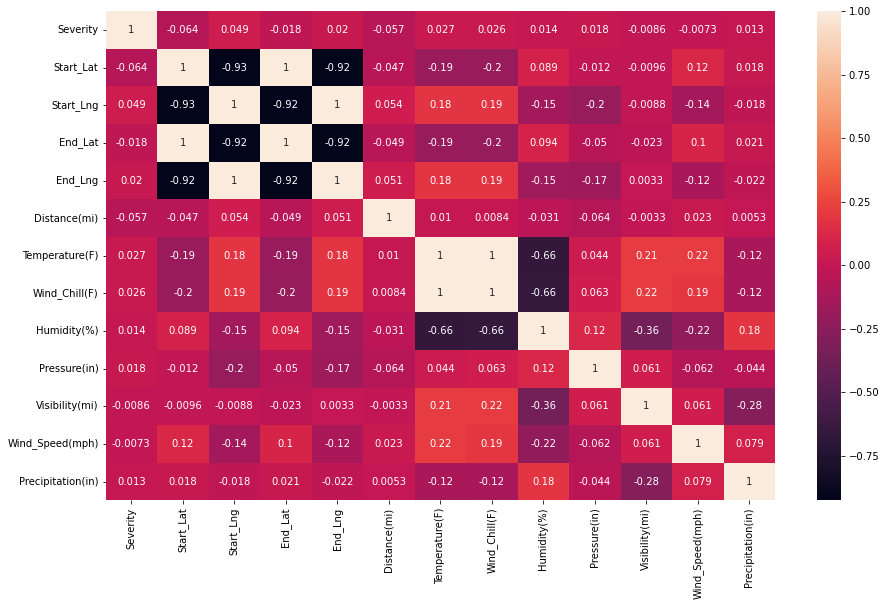

In [41]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [42]:
cities = df1['City'].unique()
len(cities)

847

In [43]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

Los Angeles            1324
Sacramento              615
San Diego               506
San Jose                293
Riverside               236
                       ... 
Woodside                  1
Springville               1
Capay                     1
Onyx                      1
Point Reyes Station       1
Name: City, Length: 847, dtype: int64

In [44]:
#top 10 cities by number of accident
accidents_by_cities[:10]

Los Angeles       1324
Sacramento         615
San Diego          506
San Jose           293
Riverside          236
Bakersfield        235
San Bernardino     215
Oakland            213
Anaheim            199
Ontario            193
Name: City, dtype: int64

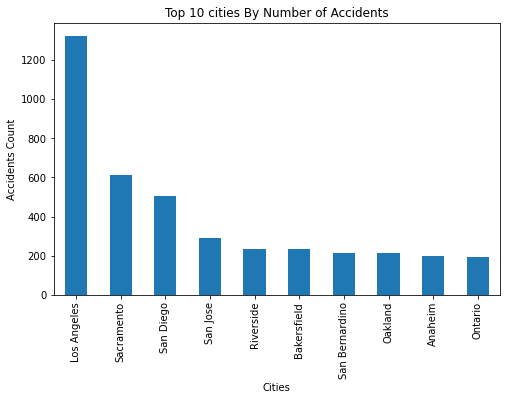

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [46]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

Severity
1      126
2    14434
3     1175
4      112
Name: ID, dtype: int64

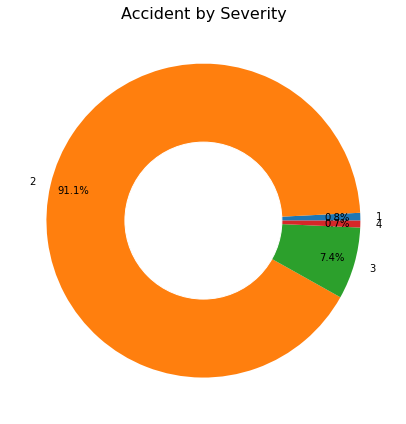

In [47]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [48]:
df1['Start_Time'].dtypes

dtype('O')

In [49]:
df1['End_Time'].dtypes

dtype('O')

In [50]:
df1 = df1.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
df1['Start_Time'].dtypes

dtype('<M8[ns]')

In [51]:
len(df1)

15847

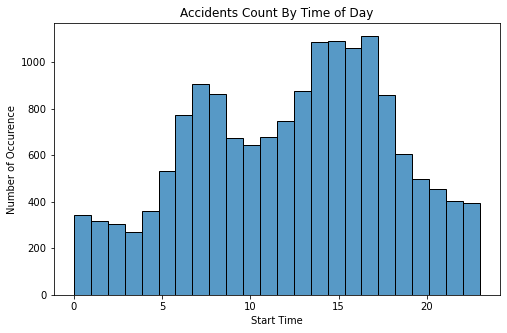

In [68]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

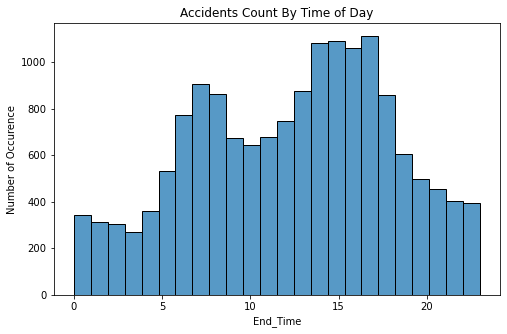

In [69]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [56]:
df1.shape  # shape of data after removing null values 

(15847, 42)

In [58]:
df_num.shape

(15847, 13)

In [63]:
# Accidents by order of severity (1 being lowest, and 4 being highest)

df1.groupby('Severity').count()['ID']

Severity
1      126
2    14434
3     1175
4      112
Name: ID, dtype: int64

In [ ]:
# scatter plot

<AxesSubplot:xlabel='Severity', ylabel='Start_Lat'>

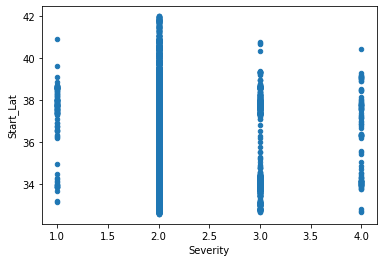

In [64]:

df_num.plot(kind='scatter', y='Start_Lat', x='Severity')


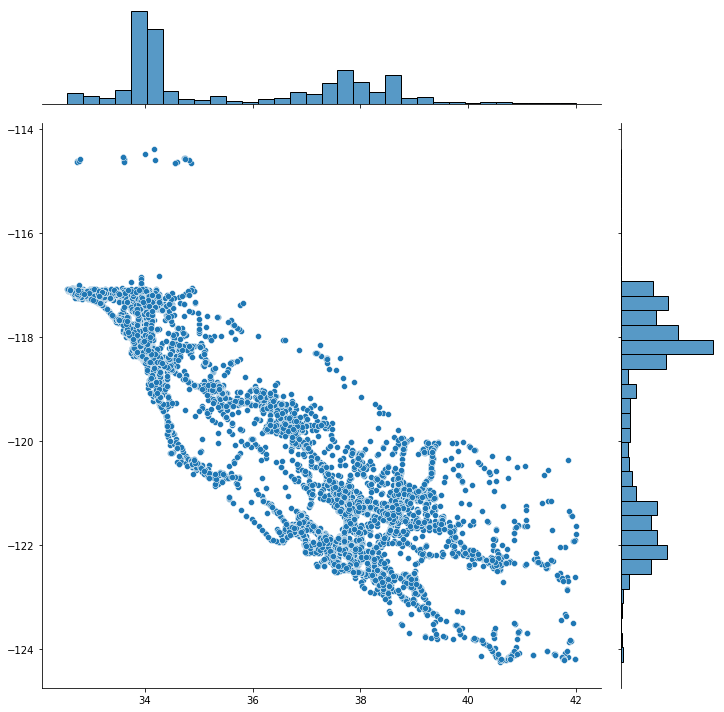

In [65]:
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

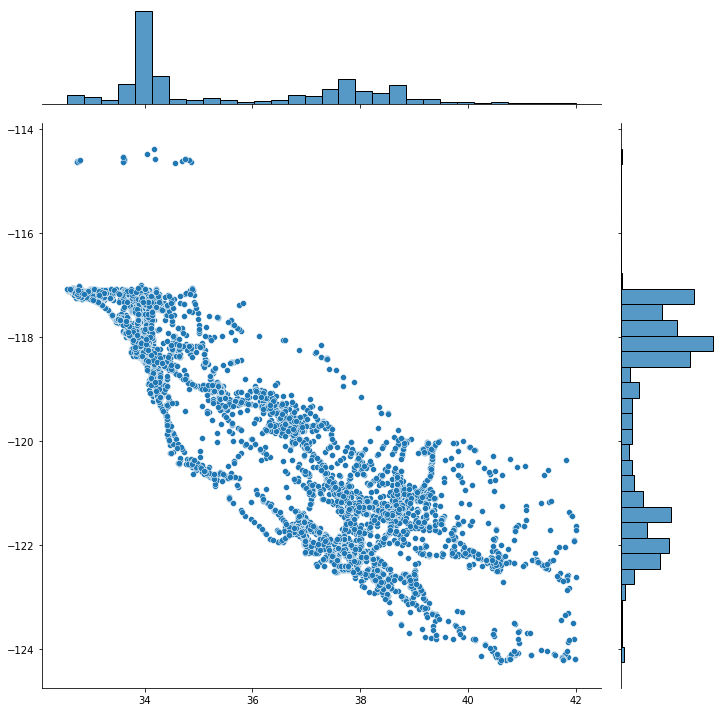

In [66]:
sns.jointplot(x=df_num.End_Lat.values , y=df_num.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()